In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [2]:
df.shape

(398, 9)

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
df.dropna(axis=0,how='any',inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [10]:
aim=pd.Series(df["mpg"],name="mpg")
aim

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

## Dropping mpg from Dataframe 

In [11]:
df.drop("mpg",axis=1,inplace=True)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#  Selection of Features

## Dependencies of the variables on the Aimed variable

In [13]:
for column in df.columns[:-2]:
    print(column,"->",np.corrcoef(df[column],aim)[0][1])

cylinders -> -0.7776175081260216
displacement -> -0.8051269467104577
horsepower -> -0.7784267838977759
weight -> -0.8322442148315753
acceleration -> 0.4233285369027875
model_year -> 0.5805409660907855


### Dropping NAME & ORIGIN from the Dataframe as they are not important

In [14]:
df.drop(["name","origin"],axis=1,inplace=True)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


# Splitting Data for Testing and Training

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,aim,test_size=0.25,shuffle=True)

In [19]:
x_train.shape

(294, 6)

In [20]:
y_train.shape

(294,)

In [21]:
x_test.shape

(98, 6)

In [22]:
y_test.shape

(98,)

In [23]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
198,4,91.0,53.0,1795,17.4,76
130,4,122.0,80.0,2451,16.5,74
48,6,250.0,88.0,3139,14.5,71
213,8,350.0,145.0,4055,12.0,76
155,6,250.0,72.0,3158,19.5,75


# Creating Model

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.intercept_

-15.741357369588336

In [27]:
model.coef_

array([-0.09950641,  0.00126137,  0.01049647, -0.0068421 ,  0.09514053,
        0.75107515])

In [28]:
eq=str(model.intercept_)
for i in range(6):
    eq+=" + ("+str(df.columns[i])+" * "+str(model.coef_[i])+")"
print(eq)

-15.741357369588336 + (cylinders * -0.09950640876556607) + (displacement * 0.001261372209919388) + (horsepower * 0.01049646850622023) + (weight * -0.006842103491880723) + (acceleration * 0.0951405330052875) + (model_year * 0.7510751479103994)


# Evaluation of Model

In [29]:
y_pred=model.predict(x_test)
y_pred[:10]

array([24.28777697, 31.52577855, 34.20931666, 18.7802386 , 33.41972498,
       30.76982199, 21.72728138,  8.12252624, 25.72302915, 30.55481689])

In [30]:
y_test.to_list()[:10]

[27.0, 43.1, 39.0, 20.0, 44.6, 34.5, 19.0, 12.0, 30.7, 28.0]

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mse

15.249828549596419

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mae

2.923520269101024

In [33]:
r_sc=r2_score(y_test,y_pred)
r_sc

0.7759238536286963

# Accuracy ~77%

## Visualizing by plotting

 Cylinders Corr Coeff: -0.78 


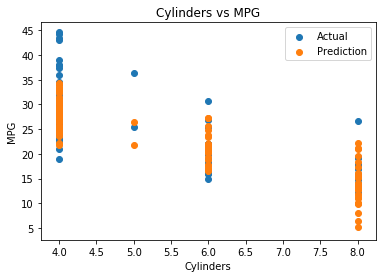

Displacement Corr Coeff: -0.81 


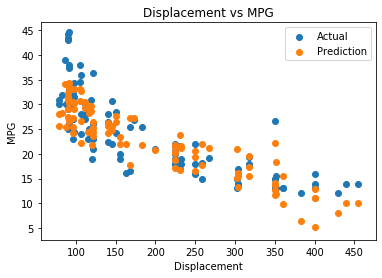

Horsepower Corr Coeff: -0.78 


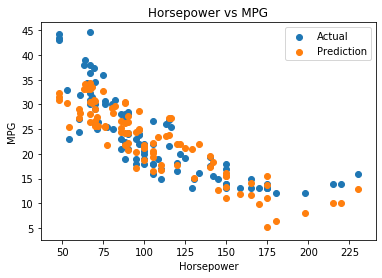

    Weight Corr Coeff: -0.83 


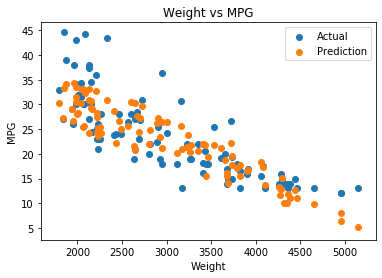

Acceleration Corr Coeff:  0.42 


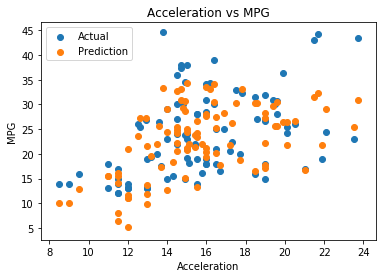

Model_Year Corr Coeff:  0.58 


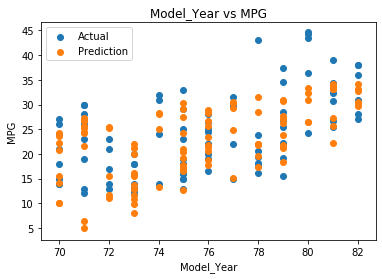

In [38]:
for col in df.columns:
    print(f"{col.title():>10} Corr Coeff: {np.corrcoef(df[col], aim)[0][1]:>5.2f} ")
    plt.scatter(x_test[col], y_test, label='Actual')
    plt.scatter(x_test[col], y_pred, label='Prediction')
    plt.xlabel(col.title())
    plt.ylabel('MPG')
    plt.title(f"{col.title()} vs MPG")
    plt.legend()
    plt.show()

In [39]:
#serialising the model
import pickle
fp=open("model.pkl","wb")
pickle.dump(model,fp)
fp.close()

# Deployment using Tkinter

In [2]:

from tkinter import *
import pickle
root=Tk()

#to clear the entry box
def clear():
    cy.set("")
    di.set("")
    hp.set("")
    we.set("")
    ac.set("")
    mo.set("")

#to predict mpg
def calculate_mpg():
    c=cy.get()
    d=di.get()
    h=hp.get()
    w=we.get()
    a=ac.get()
    m=mo.get()
    clear()
    fp=open("model.pkl","rb")
    model=pickle.load(fp)
    mpg=model.predict(np.array([c,d,h,w,a,m]).reshape(1,-1))
    t=Toplevel()
    label=Label(t,text=f"Your Car's \n Predicted Mileage is \n{mpg[0]:.2f} Miles Per Gallon.")
    label.config(bg='black', fg='white', font=('monospace', 25, 'bold'),height=5,width=20)
    label.pack()
    button=Button(t,text="Quit",command=t.destroy)
    button.config(bg='black', fg='red', font=('monospace', 25, 'bold'),height=1,width=20)
    button.pack()
    t.resizable(0,0)
    
    
#variables   
cy=DoubleVar()
di=DoubleVar()
hp=DoubleVar()
we=DoubleVar()
ac=DoubleVar()
mo=DoubleVar()

clear()

#labels
c_label=Label(root,text="Cylinders:")
d_label=Label(root,text="Displacement:")
h_label=Label(root,text="Horsepower:")
w_label=Label(root,text="Weight:")
a_label=Label(root,text="Accleration:")
m_label=Label(root,text="Model Year:")

# entry boxes
c_entry=Entry(root,textvariable=cy)
d_entry=Entry(root,textvariable=di)
h_entry=Entry(root,textvariable=hp)
w_entry=Entry(root,textvariable=we)
a_entry=Entry(root,textvariable=ac)
m_entry=Entry(root,textvariable=mo)

#buttons
button_1=Button(root,text="Get MPG",command=calculate_mpg)
button_2=Button(root,text="Exit",command=root.destroy)

#packing all widgets
c_label.grid(row=1,column=1,)
c_entry.grid(row=1,column=2,)
d_label.grid(row=2,column=1,)
d_entry.grid(row=2,column=2,)
h_label.grid(row=3,column=1,)
h_entry.grid(row=3,column=2,)
w_label.grid(row=4,column=1,)
w_entry.grid(row=4,column=2,)
a_label.grid(row=5,column=1,)
a_entry.grid(row=5,column=2,)
m_label.grid(row=6,column=1,)
m_entry.grid(row=6,column=2,)
button_1.grid(row=7,column=1,columnspan=2,sticky=W+E+N+S)
button_2.grid(row=8,column=1,columnspan=2,sticky=W+E+N+S)

c_entry.focus()

#configurations
c_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
d_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
h_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
w_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
a_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
m_label.config(bg="black",fg='white', font=('Helvetica', 20, 'italic'))
c_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
d_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
h_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
w_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
a_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
m_entry.config(bg='white', fg='black', font=('Helvetica', 20, 'italic'))
button_1.config(bg='black', fg='green', font=('monospace', 25, 'bold'),relief="raised")
button_2.config(bg='black', fg='red', font=('monospace', 25, 'bold'),relief="raised")
root.config(bg="black")
root.title("MPG Prediction")
root.resizable(0,0)

root.mainloop()